**Steps**

*     what is classification?
*     what is Logistic Regression?
*     imports
*     Handling missing values
*     Data visualization
*     removing outliers
*     One Hot Encoding
*     Feature Scaling
*     Submission

**Let us learn, how to deal with a classification problem.**


**What is Classification?**


When the target is categorical (with 2 or more classes), then we use Classification technique.


In Titanic dataset, the target is "Survived" variable with class 0 and class 1. 
class 0 indicates "not survived" and class 1 indicates "survived".



**What is Logistic Regression?**


Logistic Regression is used for classification problems. Logistic Regression is named for the     
function used at the core of the method, the Logistic function. The logistic function is also known 
as the Sigmoid function. 
It is an S-shaped curve.

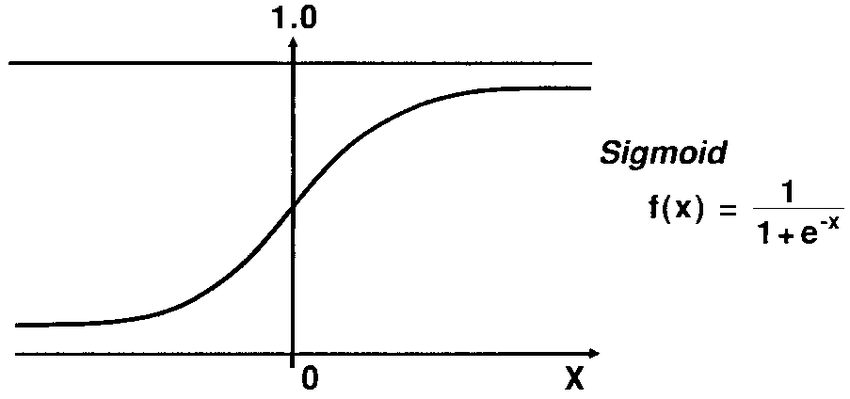

check out below links for Logistic Regression in depth.

https://youtu.be/L_xBe7MbPwk

https://youtu.be/uFfsSgQgerw


Import the libraries and modules.

In [1747]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Now import train data and test data.

In [1748]:
train = pd.read_csv('../input/titanic/titanic_train.csv')
test  = pd.read_csv('../input/titanic/test.csv')

In [1749]:
train.Survived.value_counts()

0    537
1    313
Name: Survived, dtype: int64

To know the information of the dataset, we use info() function. It gives information about variables, number of non-null count, datatype of each columns and memory usage.

In [1750]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  850 non-null    int64  
 1   Pclass       850 non-null    int64  
 2   Name         850 non-null    object 
 3   Sex          850 non-null    object 
 4   Age          676 non-null    float64
 5   SibSp        850 non-null    int64  
 6   Parch        850 non-null    int64  
 7   Ticket       850 non-null    object 
 8   Fare         849 non-null    float64
 9   Cabin        191 non-null    object 
 10  Embarked     849 non-null    object 
 11  boat         308 non-null    object 
 12  body         73 non-null     float64
 13  home.dest    464 non-null    object 
 14  Survived     850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB
None


In [1751]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


describe() function gives statistical details of the dataset.

In [1752]:
print(train.describe())

       PassengerId     Pclass         Age       SibSp       Parch        Fare  \
count   850.000000  850.00000  676.000000  850.000000  850.000000  849.000000   
mean    662.816471    2.32000   29.519847    0.522353    0.382353   34.012701   
std     380.751936    0.83853   14.562243    1.112132    0.879511   53.705779   
min       1.000000    1.00000    0.166700    0.000000    0.000000    0.000000   
25%     332.250000    2.00000   20.000000    0.000000    0.000000    7.895800   
50%     676.500000    3.00000   28.000000    0.000000    0.000000   14.108300   
75%     992.250000    3.00000   37.000000    1.000000    0.000000   31.000000   
max    1307.000000    3.00000   80.000000    8.000000    9.000000  512.329200   

             body    Survived  
count   73.000000  850.000000  
mean   165.821918    0.368235  
std     99.068487    0.482610  
min      4.000000    0.000000  
25%     75.000000    0.000000  
50%    166.000000    0.000000  
75%    260.000000    1.000000  
max    328.000

In [1753]:
print(test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Lets check the null values in the dataset.

In [1754]:
print(train.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            174
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          659
Embarked         1
boat           542
body           777
home.dest      386
Survived         0
dtype: int64


In [1755]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are null values in train dataset and test dataset.


In [1756]:
print(train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'boat', 'body', 'home.dest',
       'Survived'],
      dtype='object')


In [1757]:
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Lets remove the variables which are not significant in this data.

In [1758]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

Fill the null values with mean, median or mode according to the requirements.

In [1759]:
train['Age'].median()


28.0

In [1760]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [1761]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [1762]:
print(train.isnull().sum())

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
boat         542
body         777
home.dest    386
Survived       0
dtype: int64


There are no null values in train dataset


In [1763]:
test['Age'].median()

27.0

In [1764]:
test['Fare'].median()

14.4542

In [1765]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Age'] = test['Age'].map(lambda i: int(i))
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [1766]:
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


 There are no null values in test dataset

value_counts() gives count of unique values.

In [1767]:
train['Survived'].value_counts()

0    537
1    313
Name: Survived, dtype: int64

In [1768]:
train['Pclass'].value_counts()

3    478
1    206
2    166
Name: Pclass, dtype: int64

In [1769]:
train['Sex'].value_counts()

male      551
female    299
Name: Sex, dtype: int64

In [1770]:
train['SibSp'].value_counts()

0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: SibSp, dtype: int64

In [1771]:
train['Parch'].value_counts()

0    651
1    113
2     72
4      5
3      3
5      3
9      2
6      1
Name: Parch, dtype: int64

In [1772]:
train['Embarked'].value_counts()

S    590
C    176
Q     84
Name: Embarked, dtype: int64

In [1773]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [1774]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [1775]:
test['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [1776]:
test['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [1777]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

Lets do Data Visualization for train dataset and test dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

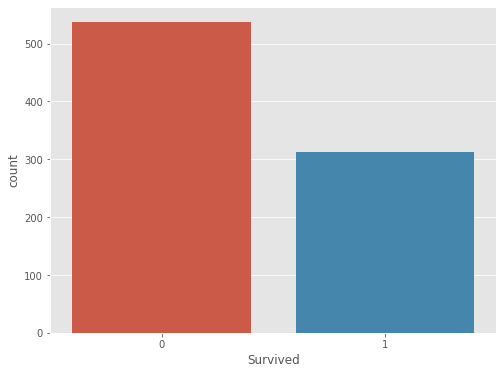

In [1778]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train)

From the above figure, we can observe that survived people are less compared to not-survived people.

<AxesSubplot:xlabel='Sex', ylabel='count'>

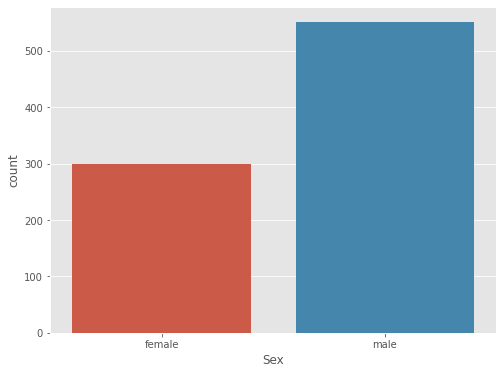

In [1779]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=train)


males are more compared to females

<AxesSubplot:xlabel='Survived', ylabel='count'>

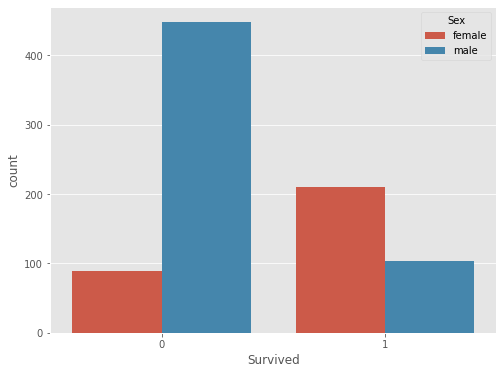

In [1780]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train)


<AxesSubplot:xlabel='Survived', ylabel='count'>

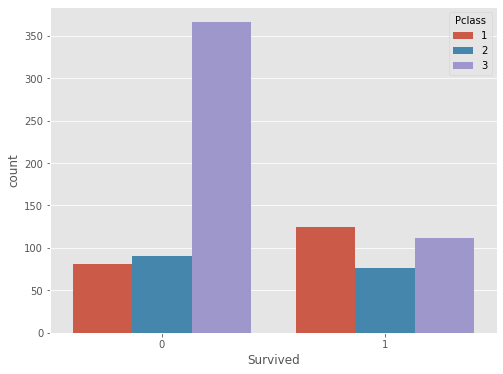

In [1781]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

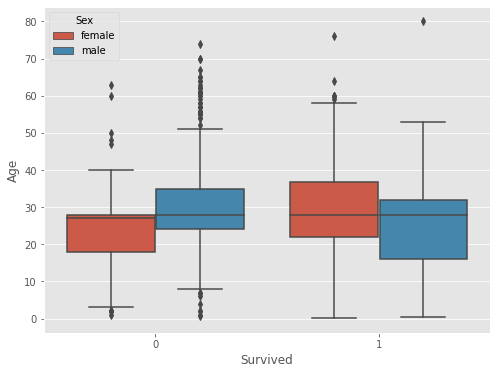

In [1782]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

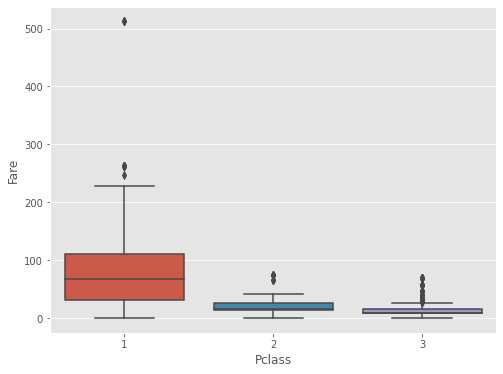

In [1783]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train)


In [1784]:
train[train['Fare'] == 0].count()
train['Pclass'].value_counts()

3    478
1    206
2    166
Name: Pclass, dtype: int64

Fare is high in Pclass 1 compared to Pclass 2 and Pclass 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

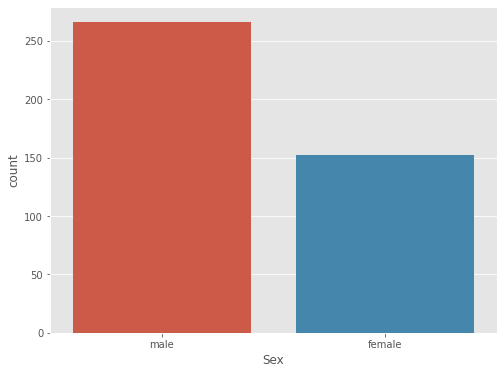

In [1785]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= test)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

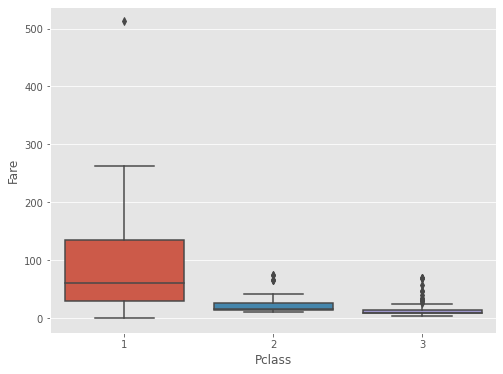

In [1786]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data= test)

Check outliers in the data

<AxesSubplot:>

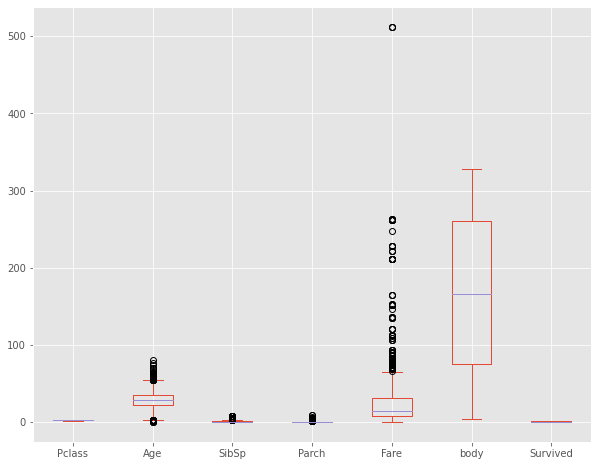

In [1787]:
train.plot(kind='box', figsize=(10, 8))


There are outliers in Age, SibSp, Parch and Fare variables. I am using clip() funtion to remove the outliers. Parch variable is removed because more than 75% of the values are 0.

In [1788]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']

train[cols] = train[cols].clip(lower=train[cols].quantile(
    0.15), upper=train[cols].quantile(0.85), axis=1)

train.drop(columns=['Parch'], axis=1, inplace=True)
train.head()


,Pclass,Sex,Age,SibSp,Fare,Embarked,boat,body,home.dest,Survived
0,3,female,28.0,0,7.7500,Q,13,NaN,NaN,1
1,3,male,38.0,0,8.6625,S,NaN,NaN,Croatia,0
2,3,female,30.0,1,24.1500,S,NaN,NaN,NaN,0
3,2,female,42.0,1,23.0000,S,4,NaN,"Cornwall / Akron, OH",1
4,2,male,40.0,0,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0


<AxesSubplot:>

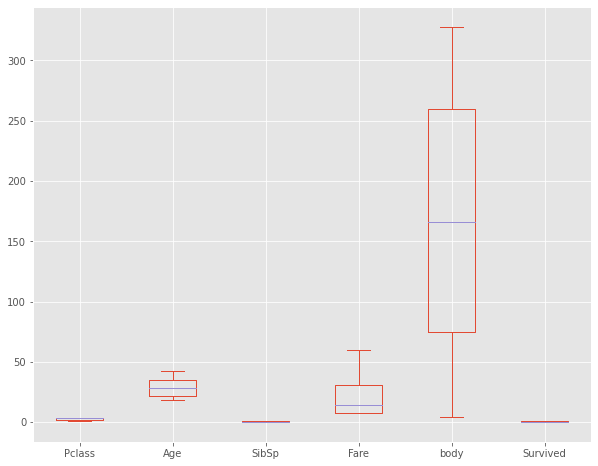

In [1789]:
train.plot(kind='box', figsize= (10,8)) 

There are no outliers in the train dataset

<AxesSubplot:>

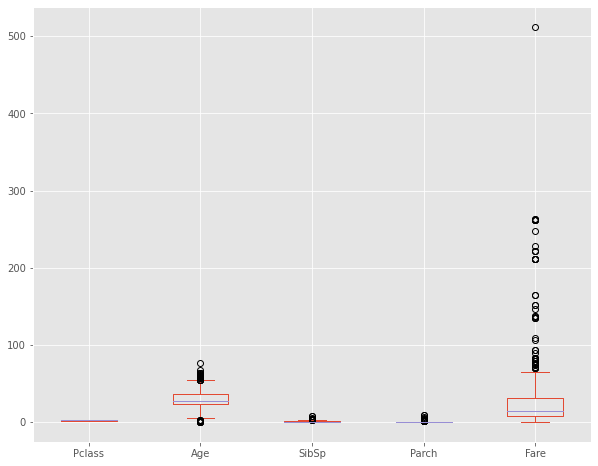

In [1790]:
test.plot(kind='box', figsize=(10, 8))


There are outliers in Age, SibSp, Parch and Fare variables. clip() funtion is used to remove the outliers. Parch variable is removed because more than 75% of the values are 0.

In [1791]:
test[cols] = test[cols].clip(lower=test[cols].quantile(
    0.15), upper=test[cols].quantile(0.85), axis=1)

test.drop(columns=['Parch'], axis=1, inplace=True)


<AxesSubplot:>

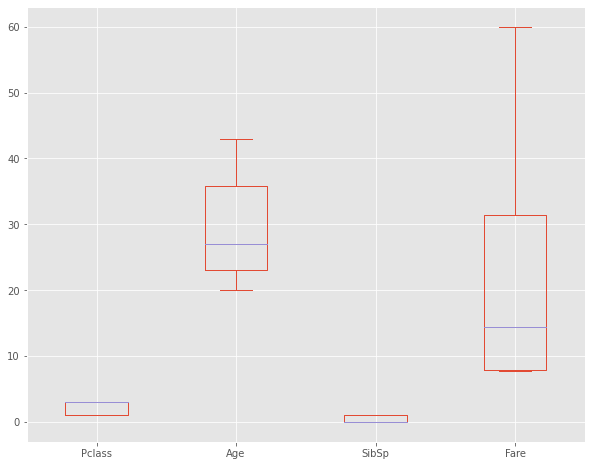

In [1792]:
test.plot(kind='box', figsize= (10,8))  

There are no outliers in the test dataset

One Hot Encoding is used to convert categorical data into numerical data.


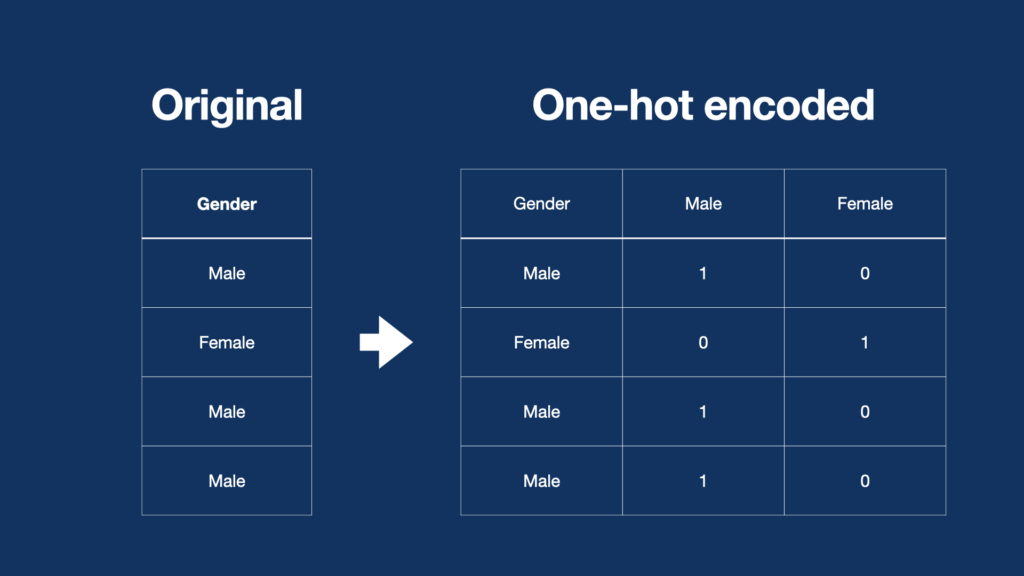

In [1793]:
cat_features = ['Pclass', 'Sex', 'Embarked']

In [1794]:
print(train.columns)
print(train['Pclass'].value_counts())
train = pd.get_dummies(train, columns=cat_features)
print(train.columns)
test = pd.get_dummies(test, columns=cat_features, drop_first=True)


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'boat', 'body',
       'home.dest', 'Survived'],
      dtype='object')
3    478
1    206
2    166
Name: Pclass, dtype: int64
Index(['Age', 'SibSp', 'Fare', 'boat', 'body', 'home.dest', 'Survived',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [1795]:
train.head()

,Age,SibSp,Fare,boat,body,home.dest,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,28.0,0,7.7500,13,NaN,NaN,1,0,0,1,1,0,0,1,0
1,38.0,0,8.6625,NaN,NaN,Croatia,0,0,0,1,0,1,0,0,1
2,30.0,1,24.1500,NaN,NaN,NaN,0,0,0,1,1,0,0,0,1
3,42.0,1,23.0000,4,NaN,"Cornwall / Akron, OH",1,0,1,0,1,0,0,0,1
4,40.0,0,13.0000,NaN,NaN,"Barre, Co Washington, VT",0,0,1,0,0,1,0,0,1


In [1796]:
test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34,0,7.8292,0,1,1,1,0
1,43,1,7.7500,0,1,0,0,1
2,43,0,9.6875,1,0,1,1,0
3,27,0,8.6625,0,1,1,0,1
4,22,1,12.2875,0,1,0,0,1


Now, lets split the data.

In [1797]:
X_train = train.drop(["body", "home.dest", "boat"], axis=1)
y_train = train['Survived'].values.reshape(-1, 1)

print(X_train.columns)
print(y_train)

X_test = test


Index(['Age', 'SibSp', 'Fare', 'Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0

Feature Scaling is used to standardize the independent variables present in the data in a fixed range.

In [1798]:
ss = StandardScaler()
# ss = MinMaxScaler(feature_range=(0,1))

In [1799]:
X_train.columns

Index(['Age', 'SibSp', 'Fare', 'Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [1800]:
features = ['Age', 'SibSp', 'Fare']

X_train[features] = ss.fit_transform(X_train[features])
X_test[features] = ss.transform(X_test[features])


In [1801]:
pip install minisom

discover_other_daemon: 1Requirement already satisfied: minisom in /home/wcyat/dev/kaggle/code/venv/lib/python3.10/site-packages (2.3.0)
Note: you may need to restart the kernel to use updated packages.


In [1802]:
import pylab
from minisom import MiniSom

In [1803]:
X_train

,Age,SibSp,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.089526,-0.695285,-0.823335,1,0,0,1,1,0,0,1,0
1,1.168274,-0.695285,-0.775994,0,0,0,1,0,1,0,0,1
2,0.162034,1.438260,0.027513,0,0,0,1,1,0,0,0,1
3,1.671394,1.438260,-0.032150,1,0,1,0,1,0,0,0,1
4,1.419834,-0.695285,-0.550960,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.671394,-0.695285,1.368637,0,1,0,0,0,1,0,0,1
846,1.671394,-0.695285,0.315453,0,1,0,0,0,1,1,0,0
847,-0.592646,1.438260,0.123493,1,0,1,0,1,0,0,0,1
848,-1.347326,1.438260,-0.510752,0,0,0,1,1,0,0,0,1


In [1804]:
for i in X_train.columns:
    X_train[i].fillna(X_train[i].median(), inplace=True)
print(X_train.columns)

Index(['Age', 'SibSp', 'Fare', 'Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [1805]:
print(X_train.values.shape[1])
minisom = MiniSom(50,50,X_train.values.shape[1])
minisom.random_weights_init(X_train.values)
minisom.train_random(X_train.values,10000,verbose=True)

12
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0417590558465721


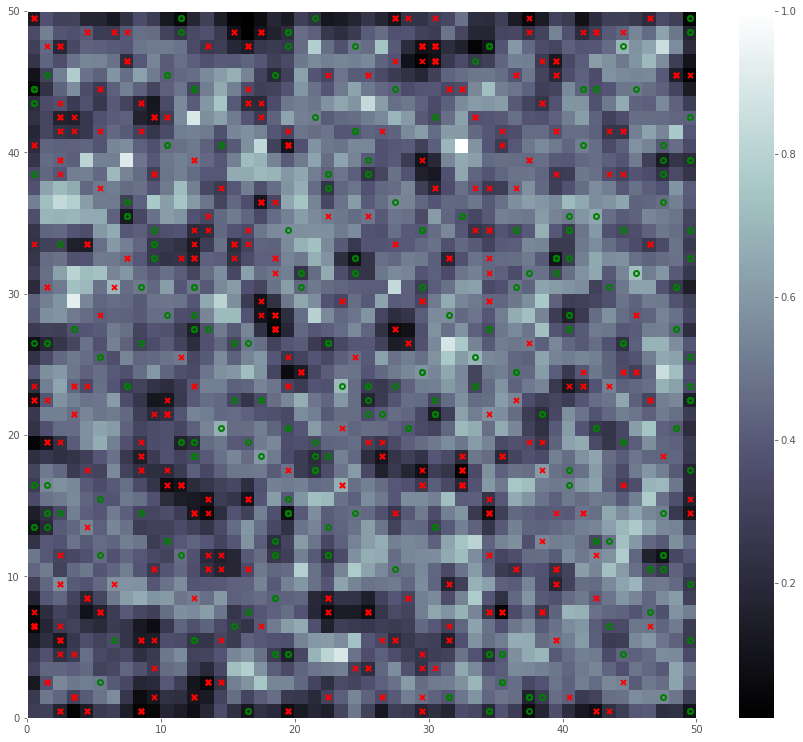

In [1806]:
pylab.figure(figsize=(15,13))
pylab.bone()

pylab.pcolor(minisom.distance_map().T)
pylab.colorbar()

# Red died and Green survived and Blue is unknown (need to predict)
markers = ['x', 'o', '']
colors = ['r', 'g', '']

for i, x in enumerate(X_train.values):
     w = minisom.winner(x)
     pylab.plot(w[0]+0.5,w[1]+0.5, markers[int(y_train[i][0])], markersize=5, markeredgecolor = colors[int(y_train[i][0])], markerfacecolor = 'None', markeredgewidth=2)

In [1807]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [1808]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
lr_pred = lr.predict_proba(X_val)[:,1] 

In [1809]:
print(lr.score(X_val, y_val))

1.0


## Decision Tree Model

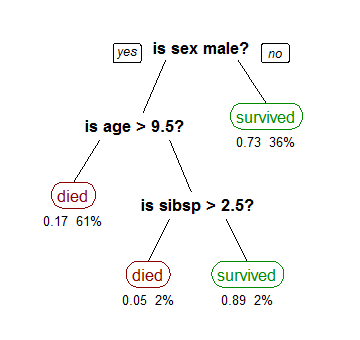

In [1810]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())
rf_pred = rf.predict_proba(X_val)[:,1] 

In [1811]:
print(rf.score(X_val, y_val))

1.0


In [1812]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1813]:
(lr_pred + rf_pred) / 2

array([0.01684767, 0.00562122, 0.021677  , 0.00849179, 0.98965171,
       0.02979103, 0.99098245, 0.03022097, 0.93917518, 0.00511717,
       0.95691233, 0.01400042, 0.02158499, 0.00635085, 0.99411661,
       0.91559616, 0.00536216, 0.91078225, 0.95691233, 0.01044521,
       0.01059648, 0.00474748, 0.95224516, 0.00574436, 0.01607625,
       0.88364402, 0.99106401, 0.01631357, 0.0062283 , 0.92533149,
       0.0134268 , 0.00562122, 0.9774889 , 0.0349291 , 0.0057519 ,
       0.00562122, 0.98923478, 0.98864091, 0.00627652, 0.02082772,
       0.02668951, 0.01666096, 0.9752832 , 0.01158511, 0.00701   ,
       0.00618655, 0.00508461, 0.97502983, 0.00649721, 0.98319459,
       0.0059852 , 0.00614911, 0.01158511, 0.94609625, 0.99220742,
       0.99460287, 0.00928889, 0.91274279, 0.00566763, 0.93536796,
       0.98045784, 0.03872193, 0.01539798, 0.03749432, 0.01106016,
       0.00480487, 0.98487263, 0.99504846, 0.00477233, 0.00855601,
       0.02408964, 0.94316129, 0.04472013, 0.00513457, 0.01427

In [1814]:
ensemble_pred = [1 if i > 0.5 else 0 for i in ((lr_pred + rf_pred) / 2)]

In [1815]:
accuracy_score(ensemble_pred, y_val.ravel())

1.0

In [1816]:
confusion_matrix(ensemble_pred, y_val.ravel())

array([[176,   0],
       [  0, 105]])

In [1817]:
precision_score(ensemble_pred, y_val.ravel())

1.0

In [1818]:
recall_score(ensemble_pred, y_val.ravel())

1.0

In [1819]:
f1_score(ensemble_pred, y_val.ravel())

1.0

A confusion matrix is a tool designed to help us understand a little better how well our classifier is performing. An *accuracy score*, like that returned by kaggle for our submission file, lets us know a number indicating what ratio of predictions were correct (0 is not one classification was correct, and 1 is perfect!). The confusion matrix does the same thing, but goes into a little more detail; this time it provides us with four values:
* The number of times our classifier produced **true negatives** (TN) the model correctly predicts the negatives class
* The number of times our classifier produced **true positives** (TP) the model correctly predicts the positive class
* The number of times our classifier produced **false positives** (FP), a type I error the model incorrectly predicts the positive class
* The number of times our classifier produced **false negatives** (FN), a type II error the model incorrectly predicts the negatives class

which scikit-learn returns in the following format, hence the name matrix (note that there is no standard convention for arrangement of this matrix):

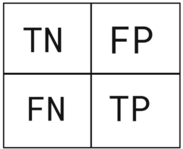

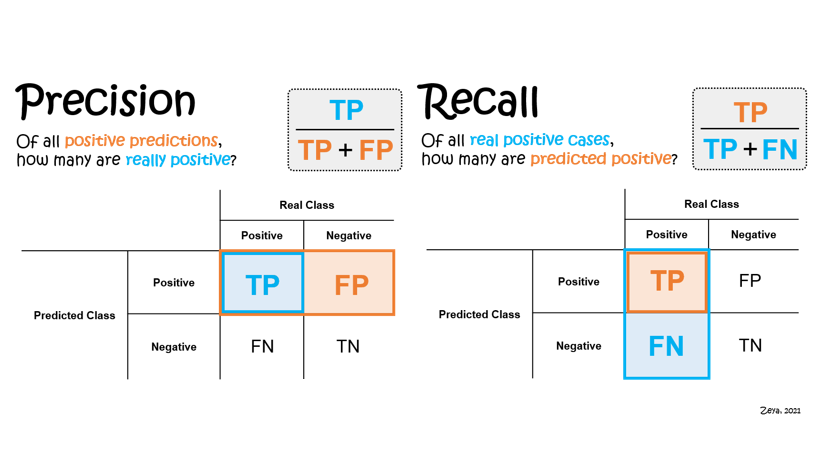

The *accuracy* is given by $\frac{(TN + TP)}{(TN + TP + FP +FN)}$, in other words, the true values divided by all the values. And finally, another measure one may come across is the **$F_1$ score**, which is given by:

$$ F_1 = 2\frac{precision . recall}{precision + recall}$$


where the *precision* is given by $\frac{TP}{TP + FP}$, and *recall* by $\frac{TP}{TP + FN}$.

These Wikipedia pages have excellent descriptions of the meaning of these terms: 
* [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* [False positives and false negatives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives)
* [Type I and type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
* [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
* [F1 score](https://en.wikipedia.org/wiki/F1_score)


In [1820]:
print(X_test.columns)
y_pred_lr = lr.predict_proba(X_test)[:,1]
y_pred_rf = rf.predict_proba(X_test)[:,1] 

predictions = (y_pred_lr + y_pred_rf) / 2
predictions = [1 if i > 0.5 else 0 for i in predictions]

Index(['Age', 'SibSp', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


ValueError: X has 8 features, but LogisticRegression is expecting 12 features as input.

In [ ]:
test = pd.read_csv('../input/titanic/test.csv')

In [ ]:
submission= pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [ ]:
submission.Survived.value_counts()

0    279
1    139
Name: Survived, dtype: int64

In [ ]:
filename = 'titanic predictions.csv'
submission.to_csv(filename, index=False)


 **If you enjoy this notebook, please share and give an upvote. Any suggestions or comments are appreciated. Happy Learning :)**